In [31]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import ndimage
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib.colors import hsv_to_rgb

In [ ]:
df=pd.read_csv('sample_prediction.csv')

In [ ]:
df.describe()

,00,01,02,03,04,05,10,11,12,13,...,42,43,44,45,50,51,52,53,54,55
count,1996.0,1996.0,1996.0,1996.0,1996.0,1996.0,1996.0,1996.0,1996.0,1996.0,...,1996.0,1996.0,1996.0,1996.0,1996.0,1996.0,1996.0,1996.0,1996.0,1996.0
mean,0.0,1.0,2.0,3.0,4.0,5.0,10.0,11.0,12.0,13.0,...,42.0,43.0,44.0,45.0,50.0,51.0,52.0,53.0,54.0,55.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,1.0,2.0,3.0,4.0,5.0,10.0,11.0,12.0,13.0,...,42.0,43.0,44.0,45.0,50.0,51.0,52.0,53.0,54.0,55.0
25%,0.0,1.0,2.0,3.0,4.0,5.0,10.0,11.0,12.0,13.0,...,42.0,43.0,44.0,45.0,50.0,51.0,52.0,53.0,54.0,55.0
50%,0.0,1.0,2.0,3.0,4.0,5.0,10.0,11.0,12.0,13.0,...,42.0,43.0,44.0,45.0,50.0,51.0,52.0,53.0,54.0,55.0
75%,0.0,1.0,2.0,3.0,4.0,5.0,10.0,11.0,12.0,13.0,...,42.0,43.0,44.0,45.0,50.0,51.0,52.0,53.0,54.0,55.0
max,0.0,1.0,2.0,3.0,4.0,5.0,10.0,11.0,12.0,13.0,...,42.0,43.0,44.0,45.0,50.0,51.0,52.0,53.0,54.0,55.0


In [ ]:
print("Dataset have \nRows-",df.shape[0],'\nColumns -',df.shape[1])

Dataset have 
Rows- 1996 
Columns - 37


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1996 entries, 0 to 1995
Data columns (total 37 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   1996 non-null   object
 1   00      1996 non-null   int64 
 2   01      1996 non-null   int64 
 3   02      1996 non-null   int64 
 4   03      1996 non-null   int64 
 5   04      1996 non-null   int64 
 6   05      1996 non-null   int64 
 7   10      1996 non-null   int64 
 8   11      1996 non-null   int64 
 9   12      1996 non-null   int64 
 10  13      1996 non-null   int64 
 11  14      1996 non-null   int64 
 12  15      1996 non-null   int64 
 13  20      1996 non-null   int64 
 14  21      1996 non-null   int64 
 15  22      1996 non-null   int64 
 16  23      1996 non-null   int64 
 17  24      1996 non-null   int64 
 18  25      1996 non-null   int64 
 19  30      1996 non-null   int64 
 20  31      1996 non-null   int64 
 21  32      1996 non-null   int64 
 22  33      1996 non-null   

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
00,1996.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01,1996.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
02,1996.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0
03,1996.0,3.0,0.0,3.0,3.0,3.0,3.0,3.0
04,1996.0,4.0,0.0,4.0,4.0,4.0,4.0,4.0
05,1996.0,5.0,0.0,5.0,5.0,5.0,5.0,5.0
10,1996.0,10.0,0.0,10.0,10.0,10.0,10.0,10.0
11,1996.0,11.0,0.0,11.0,11.0,11.0,11.0,11.0
12,1996.0,12.0,0.0,12.0,12.0,12.0,12.0,12.0
13,1996.0,13.0,0.0,13.0,13.0,13.0,13.0,13.0


In [ ]:
df.isnull().sum()

image    0
00       0
01       0
02       0
03       0
04       0
05       0
10       0
11       0
12       0
13       0
14       0
15       0
20       0
21       0
22       0
23       0
24       0
25       0
30       0
31       0
32       0
33       0
34       0
35       0
40       0
41       0
42       0
43       0
44       0
45       0
50       0
51       0
52       0
53       0
54       0
55       0
dtype: int64

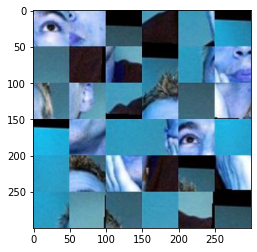

In [30]:
img = cv2.imread('Image.jpg')
plt.imshow(img)
plt.show()

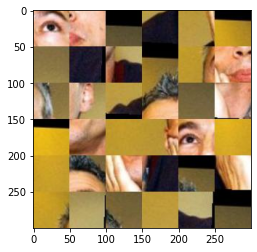

In [32]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

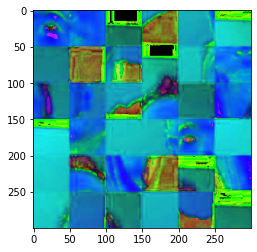

In [33]:
hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
plt.imshow(hsv_img)

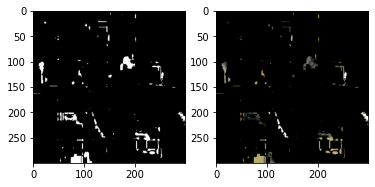

In [34]:
lower_green = np.array([25,0,20])
upper_green = np.array([100,255,255])
mask = cv2.inRange(hsv_img, lower_green, upper_green)
result = cv2.bitwise_and(img, img, mask=mask)
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

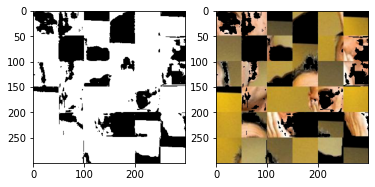

In [43]:
lower_brown = np.array([10,0,10])
upper_brown = np.array([30,255,255])
face_mask = cv2.inRange(hsv_img, lower_brown, upper_brown)
face_result = cv2.bitwise_and(img, img, mask=face_mask)
plt.subplot(1, 2, 1)
plt.imshow(face_mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(face_result)
plt.show()

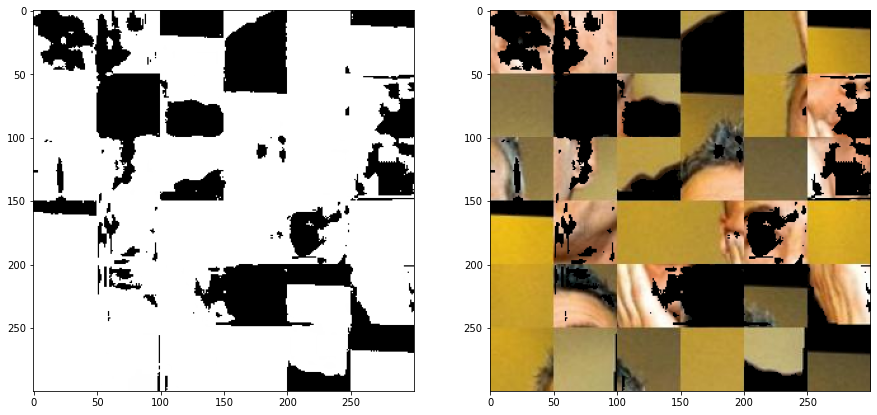

In [44]:
final_mask = mask + face_mask
final_result = cv2.bitwise_and(img, img, mask=final_mask)
plt.figure(figsize=(15,15))
plt.subplot(1, 2, 1)
plt.imshow(final_mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(final_result)
plt.show()

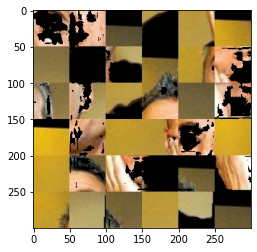

In [45]:
plt.imshow(final_result)